In [51]:
# Import proper Python modules/packages
import sqlite3, csv
import sys
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [52]:

# Connect to the brewery and beer databases
sql_beer = sqlite3.connect('beers.db')
sql_beer.execute('DROP TABLE IF EXISTS breweries')
sql_beer.execute('DROP TABLE IF EXISTS beer')

brew_df = pd.read_csv('breweries.csv', names=['id', 'name', 'city', 'state'], header=0)
beer_df = pd.read_csv('beers.csv')

# brew_df.head(10)
# beer_df.head(10)

In [53]:
names = list(brew_df.columns)
names[0] = 'id'
brew_df.columns = names
brew_df.set_index('id', inplace = True)

In [54]:
# Drop CSVs into appropriate database
brew_df.to_sql('breweries', sql_beer)
beer_df.to_sql('beer', sql_beer)

C:\Users\RothbauerA\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:2127: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


In [55]:
pd.read_sql("select * from breweries", sql_beer, index_col = 'id')

,name,city,state
id,,,
0,NorthGate Brewing,Minneapolis,MN
1,Against the Grain Brewery,Louisville,KY
2,Jack's Abby Craft Lagers,Framingham,MA
3,Mike Hess Brewing Company,San Diego,CA
4,Fort Point Beer Company,San Francisco,CA
5,COAST Brewing Company,Charleston,SC
6,Great Divide Brewing Company,Denver,CO
7,Tapistry Brewing,Bridgman,MI
8,Big Lake Brewing,Holland,MI


In [56]:
pd.read_sql('select * from beer', sql_beer, index_col='id')

,index,Unnamed: 0,abv,ibu,name,style,brewery_id,ounces
id,,,,,,,,
1436,0,0,0.050,NaN,Pub Beer,American Pale Lager,408,12.0
2265,1,1,0.066,NaN,Devil's Cup,American Pale Ale (APA),177,12.0
2264,2,2,0.071,NaN,Rise of the Phoenix,American IPA,177,12.0
2263,3,3,0.090,NaN,Sinister,American Double / Imperial IPA,177,12.0
2262,4,4,0.075,NaN,Sex and Candy,American IPA,177,12.0
2261,5,5,0.077,NaN,Black Exodus,Oatmeal Stout,177,12.0
2260,6,6,0.045,NaN,Lake Street Express,American Pale Ale (APA),177,12.0
2259,7,7,0.065,NaN,Foreman,American Porter,177,12.0
2258,8,8,0.055,NaN,Jade,American Pale Ale (APA),177,12.0


In [57]:
names = list(beer_df.columns)
names[0] = 'index'
beer_df.columns = names
beer_df.set_index('index', inplace = True)

beer_df

,abv,ibu,id,name,style,brewery_id,ounces
index,,,,,,,
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,0.065,NaN,2259,Foreman,American Porter,177,12.0
8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0


In [58]:

sql_beer = sqlite3.connect('beers.db')

# ------------------------------#
# Display Highest ABV American Pale Ales
high_abv_APA =pd.read_sql_query(
    '''SELECT abv, name, style, brewery_id 
        FROM beer 
        WHERE abv > 0.01 
        AND style LIKE "American Pale Ale%" 
        ORDER BY abv DESC LIMIT 10'''
    , sql_beer)

high_abv_APA
# ------------------------------#

,abv,name,style,brewery_id
0,0.073,Ghost Bike Pale Ale,American Pale Ale (APA),175
1,0.072,Wyoming Pale Ale,American Pale Ale (APA),550
2,0.070,The Power of Zeus,American Pale Ale (APA),168
3,0.066,Devil's Cup,American Pale Ale (APA),177
4,0.066,Manzanita Pale Ale,American Pale Ale (APA),346
5,0.065,1492,American Pale Ale (APA),167
6,0.065,Fremont Summer Ale,American Pale Ale (APA),460
7,0.065,Trail Maker Pale Ale,American Pale Ale (APA),445
8,0.065,Dale's Pale Ale,American Pale Ale (APA),166
9,0.065,Dale's Pale Ale,American Pale Ale (APA),166


In [59]:

# Show top 5 of the highest ABV American Pale Ales

APA_brew = pd.read_sql_query(
    '''SELECT beer.name AS Beer, breweries.name AS Brewery, breweries.state AS State, beer.abv AS ABV, beer.style AS Style
        FROM breweries, beer 
        WHERE beer.brewery_id=breweries.id AND beer.style LIKE "American Pale Ale%"
        ORDER BY beer.abv DESC LIMIT 10; '''
        , sql_beer)

# Put the SQL Query back into a CSV file to visualize from 

APA_csv = APA_brew.to_csv(path_or_buf='APA_csv', sep=',', encoding='utf-8')
apa_df = pd.read_csv('APA_csv')
apa_df

,Unnamed: 0,Beer,Brewery,State,ABV,Style
0,0,Ghost Bike Pale Ale,Spiteful Brewing Company,IL,0.073,American Pale Ale (APA)
1,1,Wyoming Pale Ale,Wind River Brewing Company,WY,0.072,American Pale Ale (APA)
2,2,The Power of Zeus,High Hops Brewery,CO,0.070,American Pale Ale (APA)
3,3,Devil's Cup,18th Street Brewery,IN,0.066,American Pale Ale (APA)
4,4,Manzanita Pale Ale,Manzanita Brewing Company,CA,0.066,American Pale Ale (APA)
5,5,1492,Boxcar Brewing Company,PA,0.065,American Pale Ale (APA)
6,6,Fremont Summer Ale,Fremont Brewing Company,WA,0.065,American Pale Ale (APA)
7,7,Trail Maker Pale Ale,Howard Brewing Company,NC,0.065,American Pale Ale (APA)
8,8,Dale's Pale Ale,Oskar Blues Brewery,CO,0.065,American Pale Ale (APA)
9,9,Dale's Pale Ale,Oskar Blues Brewery,CO,0.065,American Pale Ale (APA)


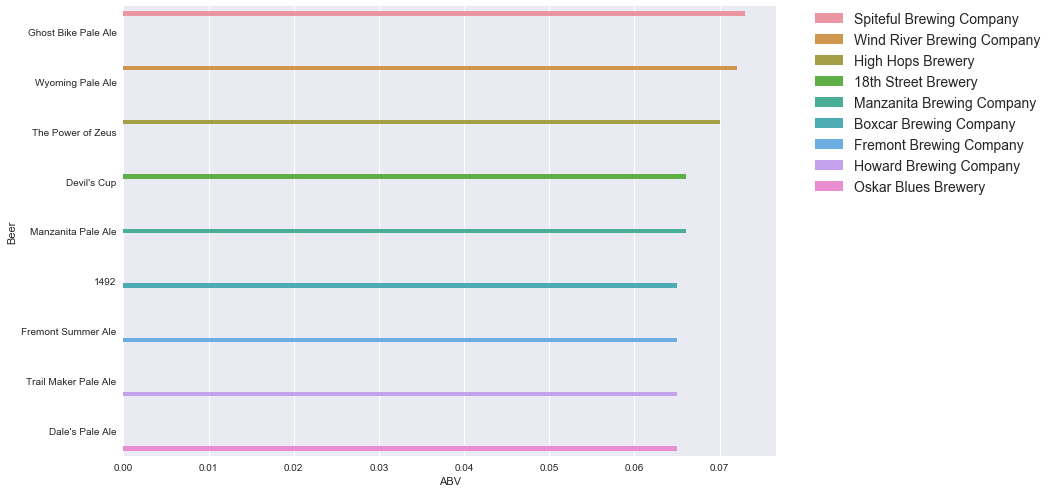

In [60]:
sns.barplot(x=apa_df.ABV, y=apa_df.Beer, hue=apa_df.Brewery, data=apa_df)
# plt.legend(loc='best')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)

In [61]:
# Show top 5 of the highest ABV India Pale Ales

IPA_brew = pd.read_sql_query(
    '''SELECT beer.name AS Beer, breweries.name AS Brewery, beer.abv AS ABV, beer.style AS Style
        FROM breweries, beer 
        WHERE beer.brewery_id=breweries.id AND beer.style LIKE "American IPA%"
        ORDER BY beer.abv DESC LIMIT 10; '''
        , sql_beer)

# Put the SQL Query back into a CSV file to visualize from 

IPA_csv = IPA_brew.to_csv(path_or_buf='IPA_csv', sep=',', encoding='utf-8')
ipa_df = pd.read_csv('IPA_csv')
ipa_df

,Unnamed: 0,Beer,Brewery,ABV,Style
0,0,Better Weather IPA,Golden Road Brewing,0.094,American IPA
1,1,oSKAr the G'Rauch,Oskar Blues Brewery,0.085,American IPA
2,2,oSKAr the G'Rauch,Oskar Blues Brewery,0.085,American IPA
3,3,Citra Ass Down,Against The Grain Brewery,0.082,American IPA
4,4,Wolf Among Weeds IPA,Golden Road Brewing,0.080,American IPA
5,5,Burning Bush Smoked IPA,Golden Road Brewing,0.080,American IPA
6,6,Wolf Among Weeds IPA (2012),Golden Road Brewing,0.080,American IPA
7,7,Habitus IPA,Hess Brewing Company,0.080,American IPA
8,8,Manzanita IPA,Manzanita Brewing Company,0.080,American IPA
9,9,Disco Superfly,Mikerphone Brewing,0.080,American IPA


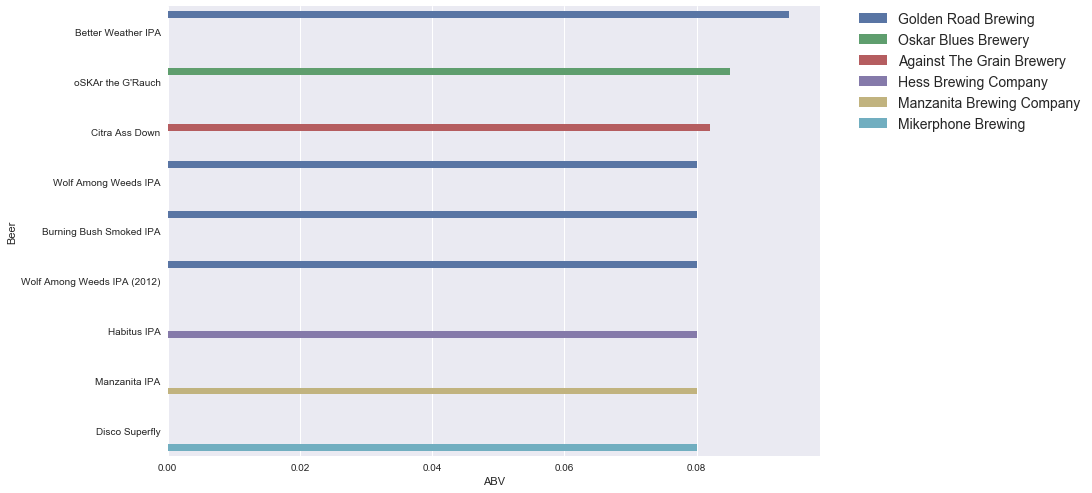

In [62]:
sns.barplot(x=ipa_df.ABV, y=ipa_df.Beer, hue=ipa_df.Brewery, data=ipa_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)

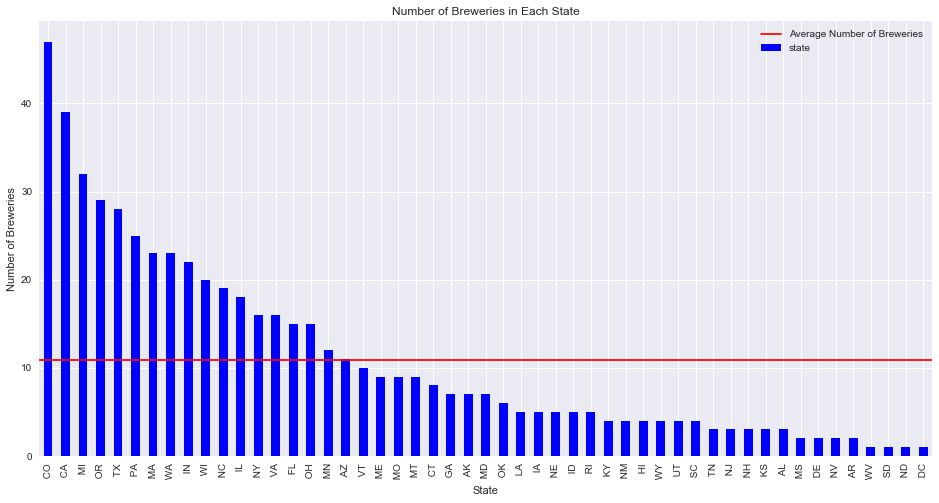

In [63]:
# Show amount of breweries from each state

total_brew = pd.read_sql_query(
    '''SELECT name, state FROM breweries'''
        , sql_beer)

total_brew_csv = total_brew.to_csv(path_or_buf='C:/Users/RothbauerA/Desktop/Code_Louisville_Python_Project/total_brew_csv', sep=',', encoding='utf-8')
total_brew_df = pd.read_csv('C:/Users/RothbauerA/Desktop/Code_Louisville_Python_Project/total_brew_csv')
# total_brew_df


# Visualize the SQL Query from above

plot = total_brew_df.state.value_counts().plot(kind='bar', title="Number of Breweries in Each State", \
                             figsize=(16,8), colormap='winter')
plot.set_xlabel('State')
plot.set_ylabel('Number of Breweries')
mean_line = plot.axhline(total_brew_df.state.value_counts().mean(), color='r',\
                         label='Average Number of Breweries')
plt.legend()